# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10'
simulation_time = 10
analysis_time = 100.0
analysis_step = 0.0
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 123
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 1000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-12
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-12
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
#simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 0.876
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 8.15e-11

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-06-18 11:15:08,943 - P15585 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 10s
2018-06-18 11:15:08,966 - P15585 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-06-18 11:15:09,053 - P15585 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-06-18 11:15:09,055 - P15585 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticity10
2018-06-18 11:15:09,058 - P15585 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-06-18 11:15:09,061 - P15585 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-06-18 11:15:09,090 - P15585 - MemTotal:88M - Simulation - DEBUG: Setting Global NEST Seed: 134
2018-06-18 11:15:09,093 - P15585 - MemTotal:88M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
2018-06-18 11:15:09,095 - P15585 - MemTotal:88M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in laye

Visualize the simulation or only run it.

In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(8,4))
    axis = fig.add_subplot(1,2,1)
    line,= axis.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('MI & Hit evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    axis2 = fig.add_subplot(1,2,2)
    target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

2018-06-18 11:15:10,152 - P15585 - MemTotal:252M - Simulation - INFO: Running the simulation from 0.0s until time 10s
2018-06-18 11:15:10,171 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 0.136s until 0.136s
2018-06-18 11:15:10,383 - P15585 - MemTotal:252M - Simulation - DEBUG: Simulation time is 0.209986925125 seconds. Real-time rate: 0.647659371739281
2018-06-18 11:15:10,402 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 0.035s until 0.171s
2018-06-18 11:15:10,460 - P15585 - MemTotal:252M - Simulation - DEBUG: Simulation time is 0.0565340518951 seconds. Real-time rate: 0.6190959046225345
2018-06-18 11:15:10,478 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 0.028999999999999998s until 0.2s
2018-06-18 11:15:10,533 - P15585 - MemTotal:252M - Simulation - DEBUG: Simulation time is 0.0535981655121 seconds. Real-time rate: 0.5410632942924375
2018-06-18 11:15:10,551 - P15585 - MemTotal:252M - Simulation - DEBUG: Running 

2018-06-18 11:15:19,390 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 0.5010000000000003s until 7.706000000000001s
2018-06-18 11:15:19,910 - P15585 - MemTotal:252M - Simulation - DEBUG: Simulation time is 0.518471956253 seconds. Real-time rate: 0.9663010582494768
2018-06-18 11:15:19,928 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 0.07800000000000029s until 7.784000000000002s
2018-06-18 11:15:20,014 - P15585 - MemTotal:252M - Simulation - DEBUG: Simulation time is 0.08442902565 seconds. Real-time rate: 0.9238528977383471
2018-06-18 11:15:20,034 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 0.9500000000000002s until 8.734000000000002s
2018-06-18 11:15:20,984 - P15585 - MemTotal:252M - Simulation - DEBUG: Simulation time is 0.948475837708 seconds. Real-time rate: 1.0016069595364332
2018-06-18 11:15:21,001 - P15585 - MemTotal:252M - Simulation - DEBUG: Running the simulation 1.2659999999999982s until 10.0s
2018-06-18

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-06-18 11:15:22,988 - P15585 - MemTotal:253M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5


## GoC activity analysis

Show the GoC acticity rasterplot

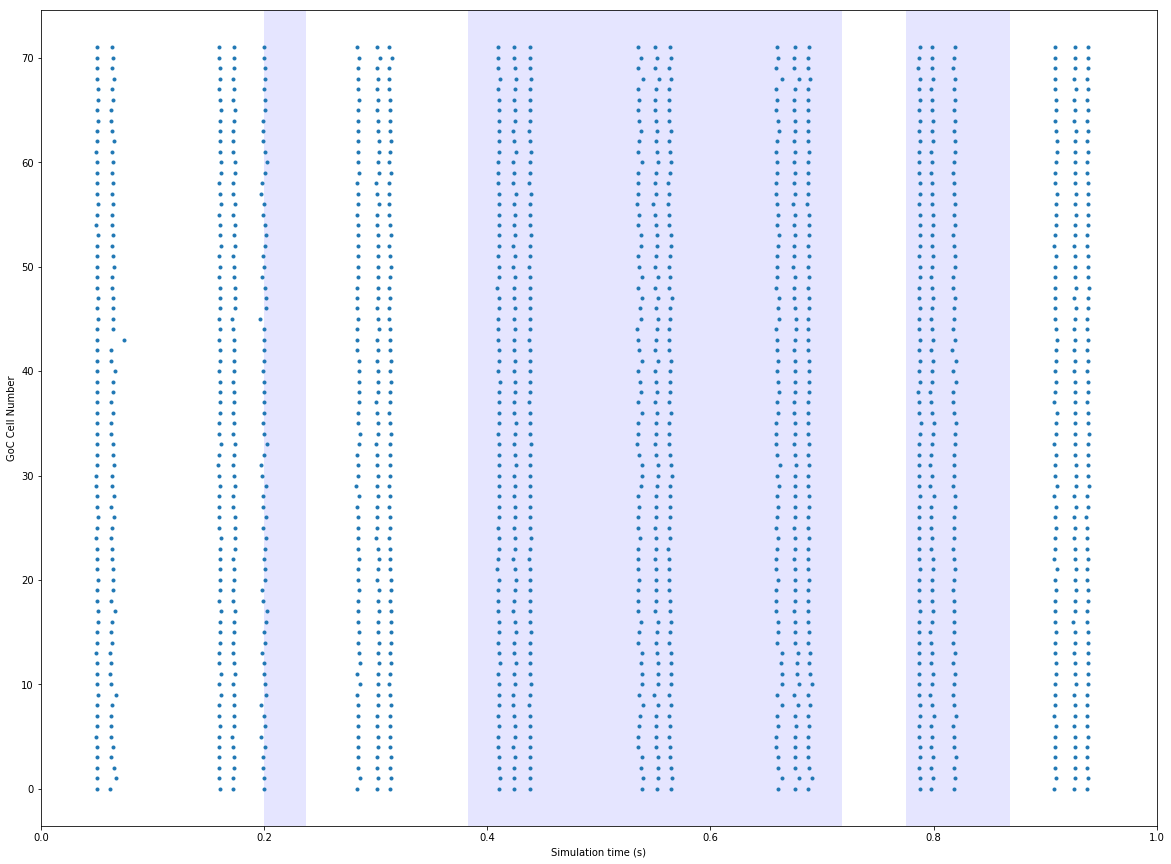

In [16]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time - 9.0
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: 2.9864583333333337 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

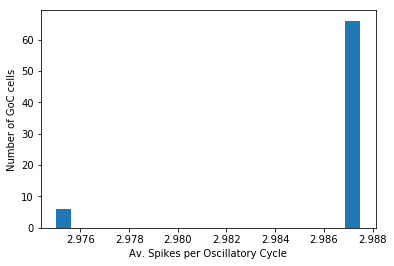

In [10]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 71998
Weight sum histogram MF-GoC: 71998


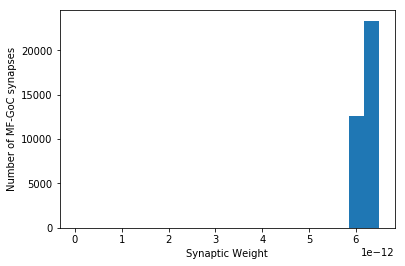

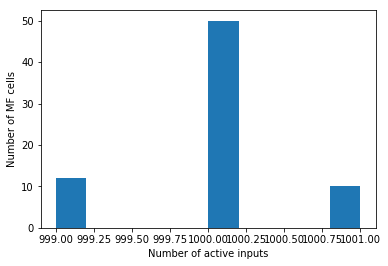

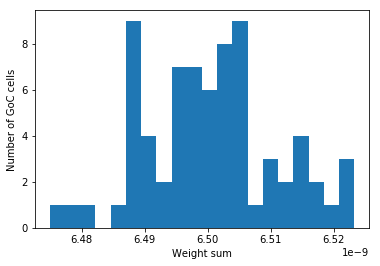

In [11]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,6.5e-12))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

Text(0.5,1,u'Weight vs Pattern Activation')

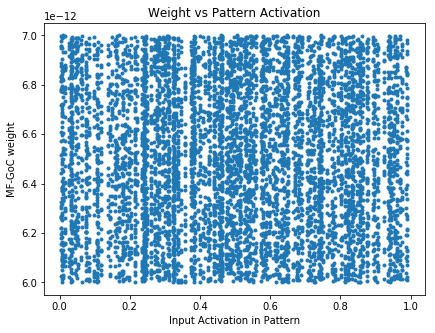

In [12]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of MF cells')

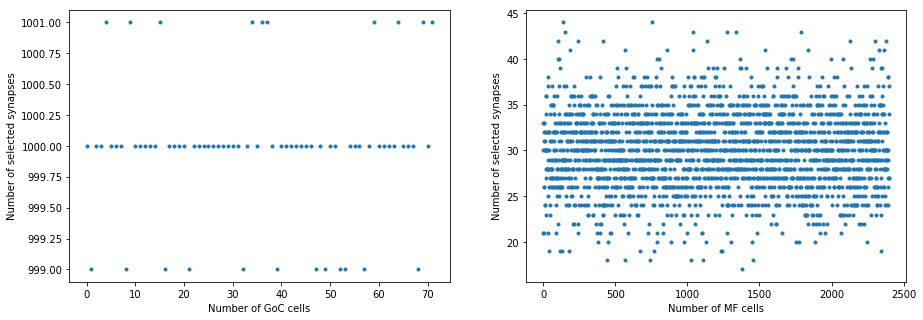

In [13]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [14]:
simulation.analyze_av_MI()

2018-06-18 11:15:24,571 - P15585 - MemTotal:254M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-06-18 11:15:24,573 - P15585 - MemTotal:254M - Simulation - INFO: Analyzing mutual information from time 0 to 10.0 seconds
2018-06-18 11:15:24,576 - P15585 - MemTotal:254M - Simulation - INFO: Average firing rate in MI analysis: 23.891666666666666Hz
2018-06-18 11:15:24,586 - P15585 - MemTotal:254M - Simulation - INFO: Individual pattern hit matrix:
2018-06-18 11:15:24,587 - P15585 - MemTotal:254M - Simulation - INFO: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
2018-06-18 11:15:24,590 - P15585 - MemTotal:254M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-18 11:15:24,591 - P15585 - MemTotal:254M - Simulation - INFO: [[0. 0. 0. 0. 0

[array([0.])]

In [15]:
simulation.analyze_Hits_Top()

2018-06-18 11:15:24,660 - P15585 - MemTotal:254M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-06-18 11:15:24,665 - P15585 - MemTotal:254M - Simulation - INFO: Average firing rate in MI analysis: 23.891666666666666Hz
2018-06-18 11:15:24,677 - P15585 - MemTotal:254M - Simulation - INFO: Individual pattern hit matrix:
2018-06-18 11:15:24,678 - P15585 - MemTotal:254M - Simulation - INFO: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
2018-06-18 11:15:24,680 - P15585 - MemTotal:254M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-06-18 11:15:24,682 - P15585 - MemTotal:254M - Simulation - INFO: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0

[0.0]